### Лабораторная работа №2
### K-Means

In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("задача_1_леденцы/Леденцы.csv", sep=";")
print(df)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0     4   5   5   5   3   3   3   3   3    3    3
1     5   4   5   5   3   3   3   3   3    3    3
2     5   5   4   5   3   3   3   3   3    3    3
3     5   4   5   5   3   3   3   3   3    3    3
4     4   5   5   5   3   3   3   3   3    3    3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
333   3   3   3   3   3   3   5   5   3    3    3
334   3   3   3   3   3   3   5   5   3    3    3
335   3   3   3   3   3   3   5   5   3    3    3
336   3   3   3   3   3   3   5   5   3    3    3
337   3   3   3   3   3   3   5   5   3    3    3

[338 rows x 11 columns]


Определим оптимальное число кластеров, для этого воспользуемся методом локтя и метрикой силуэт.

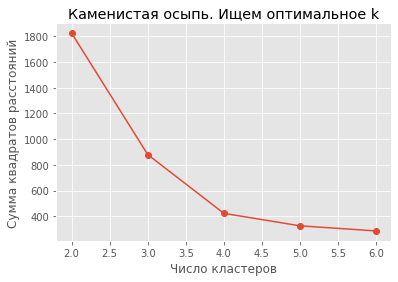

In [3]:
K = range(2, 7)
models = [KMeans(n_clusters=k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

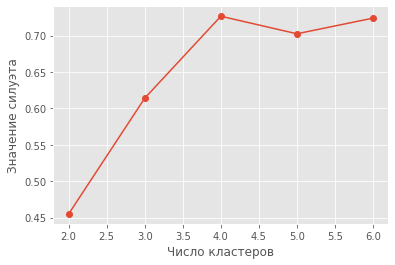

In [4]:
silhouettes = [silhouette_score(df, model.labels_) for model in models]
plt.plot(K, silhouettes, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Значение силуэта')
plt.show()

Как видно из обоих графиков, оптимальное число кластеров - 4.

In [5]:
model = KMeans(n_clusters=4, max_iter=300, n_init=10, verbose=0)
model.fit(df)
df['cluster'] = model.labels_

In [6]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
2,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [7]:
df.groupby('cluster').median()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0
1,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0
3,3.0,3.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0


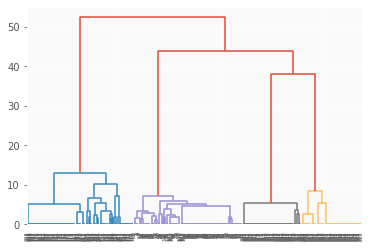

In [8]:

link=linkage(df,'ward','euclidean')
dn = dendrogram(link, color_threshold=14)
df['cluster1'] = fcluster(link, 4, criterion='maxclust')

In [9]:
tab = pd.crosstab(df['cluster1'], df['cluster'])

print(tab)

cluster    0    1    2   3
cluster1                  
1          0    0  108   0
2          0  110    0   0
3         59    0    0   0
4          0    0    0  61


Как мы видим наш результат полностью совпал с тем, который мы получили, используя иерархический кластерный анализ,
таким образом мы можем продублировать наши предыдущие выводы.

### Анализ и интерпретация результатов
Перед тем, как приступать непосредственно к анализу данных, можно попробовать сгруппировать вопросы с близкой семантикой.
Так, первые четыре вопроса касаются свежести дыхания и полости рта, следующие два - вкусовых качеств, 7 и 8 - концентрации
или отвлечения внимания, а последние три - использования леденцов в лечебных целях.
Это же разбиение можно проследить и в данных. Рассмотрим медианные значения по ответам для получившихся кластеров.
К первому кластеру отнесены те респонденты, которые поставили наивысшую оценку "медицинским" вопросам.
Во втором кластере оказались те участники, которые используют леденцы для освежения дыхания и полости рта.
Те голосовавшие, которые оказались в третьем кластере, предпочитают использовать леденцы для того, чтобы отвлечь/сфокусировать свое внимание.
И наконец последний кластер объединяет тех людей, для которых главное в леденцах - вкусовая составляющая.

Отметим также, что, согласно кластеризации, респонденты в среднем выделяют наиболее важные для них пункты "пятеркой", а
все остальные - "тройкой". При этом участники, отнесенные к первому ("медицинскому") кластеру, наиболее категорично относятся
ко всем остальным пунктам, зачастую выставляя им "двойки".